Example of augmenting one image. This notebook is a work in progress.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as pilimg
import augmentation

img_origin = np.array(pilimg.open('data/original/images/img_Testes2.tiff'))
img_label = np.array(pilimg.open('data/original/labels/img_Testes2.png'))

rqi_len_interv = (20,60)    # Range of possible lengths for augmentation (parameter l in the paper)
min_len_interv = (5,15)     # Range of possible lengths for the discontinuity region (parameter l_d in the paper)
n_rqi_interv = (1,5)        # Number of segments to augment
back_threshold = 2          # Similarity threshold for searching a valid background for the discontinuity

img_aug, debug_full, proto_graph = augmentation.create_image(
    img_origin = img_origin,
    img_label = img_label,
    rqi_len_interv = rqi_len_interv, 
    min_len_interv = min_len_interv, 
    n_rqi_interv = n_rqi_interv,
    back_threshold = back_threshold,
    rng_seed = 10,
    highlight_center = False)

The cell below shows visualizations of the main steps of the methodology

Text(0.5, 1.0, 'Final image')

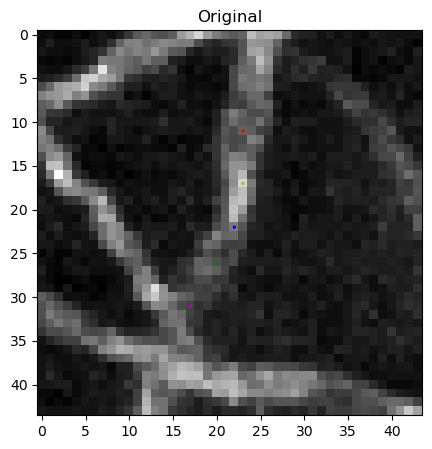

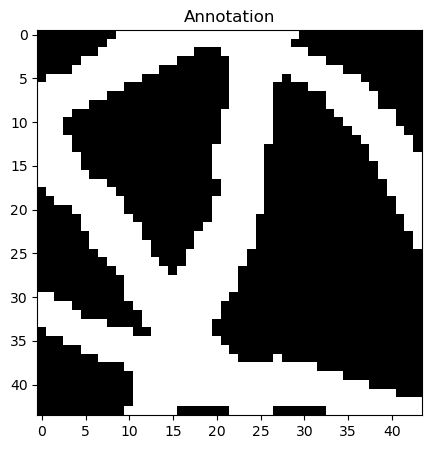

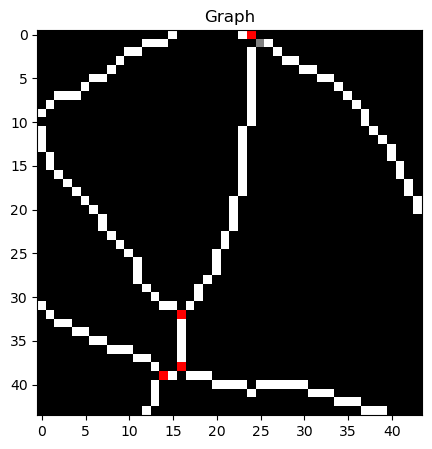

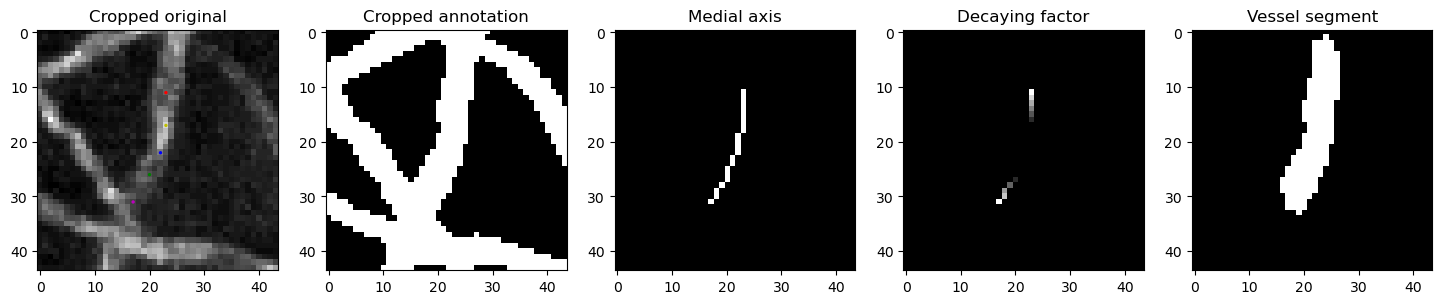

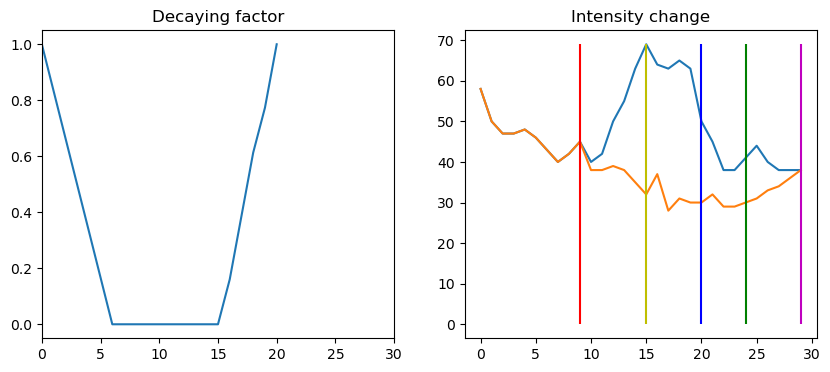

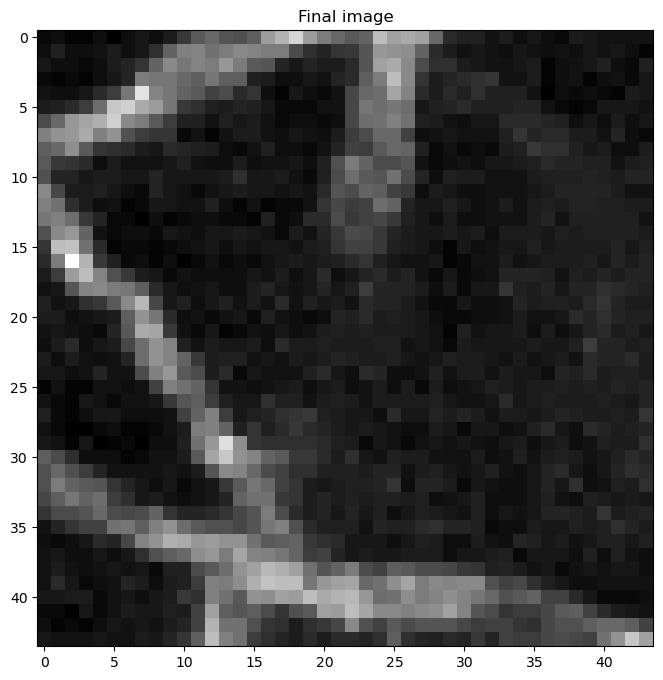

In [14]:
ori_crop, lbl_crop, new_crop, new_crop_dyn, img_seg_crop, rqi_len, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand, new_crop_mod = debug_full[0]

img_exp, img_ret_loc, out_put_conv, img_only_back, coords_loc, coords_loc_new, contorno = debug_expand

img_graph = augmentation.util.graph_to_img(proto_graph, img_label.shape, node_pixels_color=(128, 128, 128),
                                  edge_color=(255, 255, 255)) 

rqi_len_param = 100
inds = [idxp1, idxpp1, idxpc, idxpp2, idxp2]
p_row = [obj_cords[idx][0] for idx in inds]
p_col = [obj_cords[idx][1] for idx in inds]
pc = (p_row[2], p_col[2])
min_r = max([0, pc[0]-rqi_len])
min_c = max([0, pc[1]-rqi_len])
region = (slice(min_r, pc[0]+rqi_len), 
          slice(min_c, pc[1]+rqi_len))
p_row_slice = [p-min_r for p in p_row]
p_col_slice = [p-min_c for p in p_col]

plt.figure(figsize=(14,5))
plt.imshow(img_origin[region], 'gray')
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Original')
plt.figure(figsize=(14,5))
plt.imshow(img_label[region], 'gray')
plt.title('Annotation')
plt.figure(figsize=(14,5))
plt.imshow(img_graph[region], 'gray')
plt.title('Graph')

plt.figure(figsize=(18,4))
plt.subplot(1, 5, 1)
plt.imshow(ori_crop, 'gray')
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Cropped original')
plt.subplot(1, 5, 2)
plt.imshow(lbl_crop, 'gray')
plt.title('Cropped annotation')
plt.subplot(1, 5, 3)
plt.imshow(new_crop, 'gray')
plt.title('Medial axis')
plt.subplot(1, 5, 4)
plt.imshow(new_crop_dyn, 'gray')
plt.title('Decaying factor')
plt.subplot(1, 5, 5)
plt.imshow(img_seg_crop, 'gray')
plt.title('Vessel segment')

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(rqi_int_plot)
plt.xlim((0,len(vessel_int_plot)))
plt.title('Decaying factor')
plt.subplot(1, 2, 2)
plt.plot(vessel_int_plot)
plt.plot(vessel_int_new)
plt.vlines([idxp1, idxpp1, idxpc, idxpp2, idxp2], ymin=0, ymax=max(vessel_int_plot), colors=['r', 'y', 'b', 'g', 'm'])
plt.title('Intensity change')

plt.figure(figsize=(8,8))
plt.imshow(img_aug[region], 'gray')
plt.title('Final image')
